# Audio Visualization

## Initial Practice

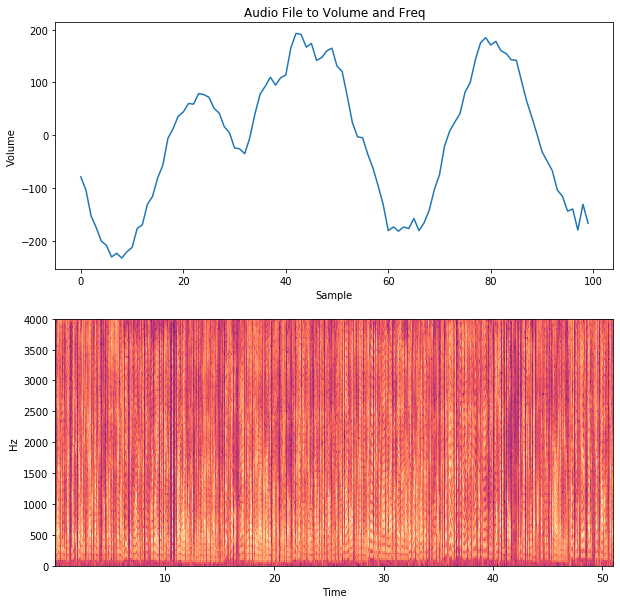

In [63]:
import matplotlib.pyplot as plot
from scipy.io import wavfile
%matplotlib inline

samplingFrequency, signalData = wavfile.read('male.wav')

plot.figure(figsize=(10,10))
plot.subplot(211)
plot.title('Audio File to Volume and Freq')

plot.plot(signalData[:100])
# plot.plot(signalData[:100], np.arange(0, samplingFrequency, 1))
plot.xlabel('Sample')
plot.ylabel('Volume')

plot.subplot(212)

plot.specgram(signalData, mode='psd',Fs=samplingFrequency, cmap = 'magma')
plot.xlabel('Time')
plot.ylabel('Hz')

plot.show()

In [61]:
np.arange(0, samplingFrequency, 1).shape

(8000,)

In [62]:
signalData.shape

(408226,)

In [53]:
samplingFrequency

8000

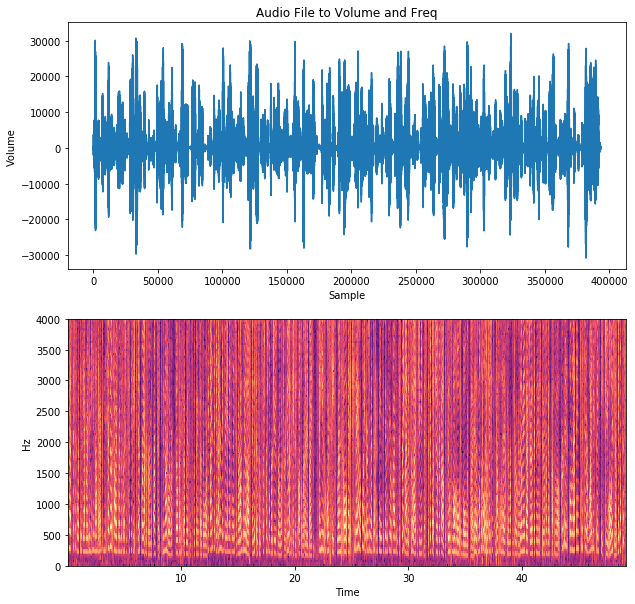

In [64]:
samplingFrequency, signalData = wavfile.read('female.wav')

plot.figure(figsize=(10,10))
plot.subplot(211)
plot.title('Audio File to Volume and Freq')

plot.plot(signalData)
plot.xlabel('Sample')
plot.ylabel('Volume')

plot.subplot(212)

plot.specgram(signalData, mode='psd',Fs=samplingFrequency, cmap = 'magma')
plot.xlabel('Time')
plot.ylabel('Hz')

plot.show()

## Using Librosa

In [4]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [66]:
data, sr = librosa.load('male.wav', sr=40000, duration=10, mono=True,)
print(data.shape)
print(sr)

(400000,)
40000


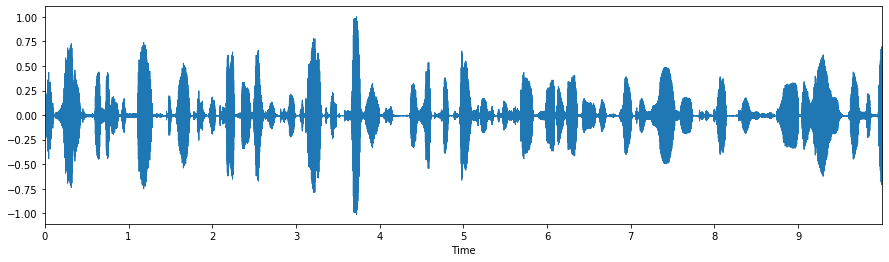

In [74]:
plt.figure(figsize=(15,4))
librosa.display.waveplot(data,sr=sr, max_points=None, x_axis='time', offset=0.0)#, max_sr=100)

In [6]:
ipd.Audio('male.wav')

In [109]:
ipd.Audio('female_osr.wav')

In [110]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
%matplotlib inline

In [111]:
freq, deets = wavfile.read('female_osr.wav')

Text(0, 0.5, 'volume')

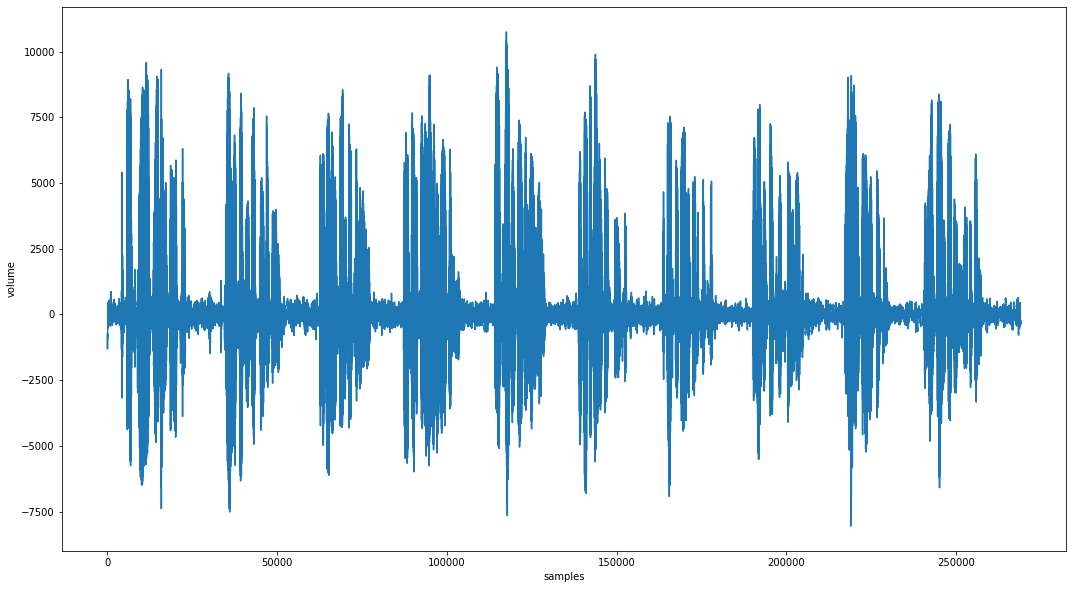

In [115]:
plt.figure(figsize=(18,10))
plt.plot(deets)
plt.xlabel('samples')
plt.ylabel('volume')


In [76]:
ipd.Audio('female.wav')

In [34]:
# plt.figure(figsize=(15,4))
filename = 'female.wav'
data,sample_rate1 = librosa.load(filename, sr=44100, mono=True, offset=0.0, duration=100, res_type='scipy')

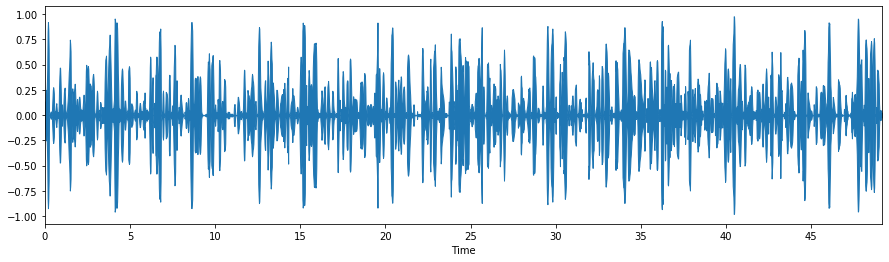

In [35]:
plt.figure(figsize=(15,4))
librosa.display.waveplot(data,sr=sample_rate1, max_points=600, x_axis='time', offset=0.0, max_sr=49)

In [36]:
print(data)
print(len(data))
print(sample_rate1)
sr = sample_rate1

[ 0.00421136  0.00212468 -0.000212   ...  0.00534065  0.00594781
  0.00557311]
2168331
44100


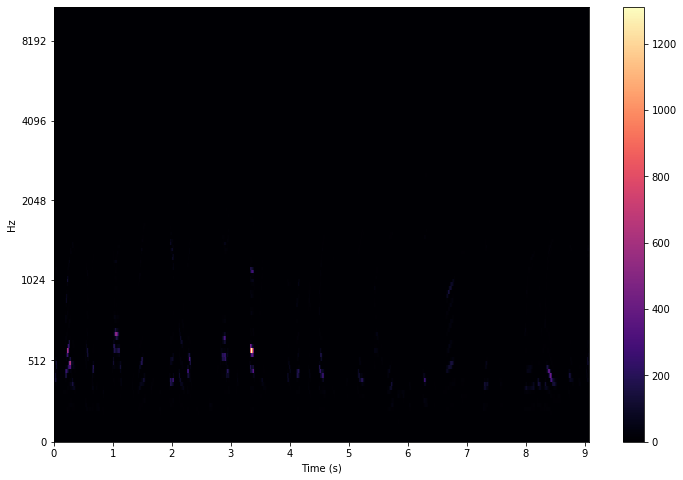

In [77]:
spec = librosa.feature.melspectrogram(y=data, sr=sample_rate1)
import librosa.display
plt.figure(figsize=(12,8))
librosa.display.specshow(spec,y_axis='mel', x_axis='s', sr=sample_rate1)
plt.colorbar()

In [78]:
sample_rate1

44100

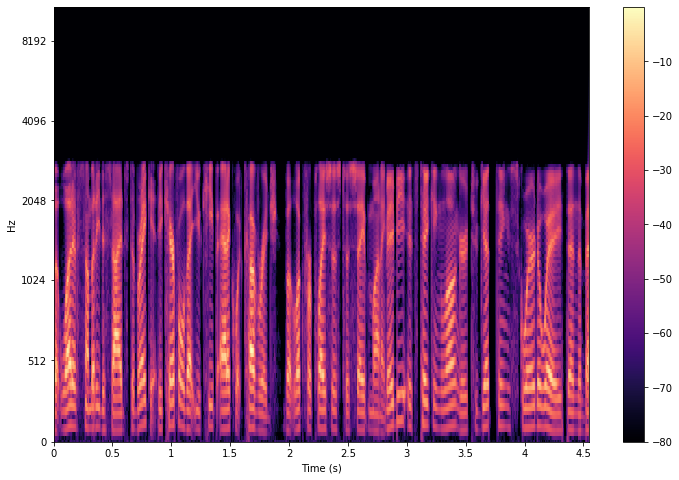

In [79]:
db_spec = librosa.power_to_db(spec, ref=np.max,)
plt.figure(figsize=(12,8))
librosa.display.specshow(db_spec,y_axis='mel', x_axis='s', sr=88000)
plt.colorbar();

In [80]:
#mfcc
y, sr = librosa.load(filename, sr=44100, mono=True, offset=0.0, duration=100, res_type='scipy')
mfcc = librosa.feature.mfcc(y=y, sr=sr)

[Text(0.5, 1.0, 'MFCC')]

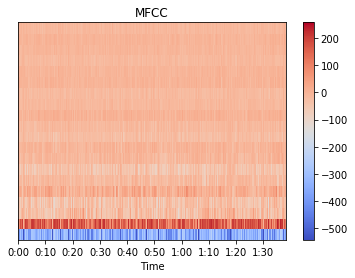

<Figure size 576x576 with 0 Axes>

In [82]:
fig, ax = plot.subplots()
plot.figure(figsize=(8,8))
img = librosa.display.specshow(mfcc, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')

## Harmonic and percussive compenents

In [ ]:
data_h, data_p = librosa.effects.hpss(data)
spec_h = librosa.feature.melspectrogram(data_h, sr=sr)
spec_p = librosa.feature.melspectrogram(data_p, sr=sr)
db_spec_h = librosa.power_to_db(spec_h,ref=np.max)
db_spec_p = librosa.power_to_db(spec_p,ref=np.max)

In [ ]:
#Harmonic
plt.figure(figsize=(12,8))
plot.title('Harmonic Mel Spectograph')
librosa.display.specshow(db_spec_h,y_axis='mel', x_axis='s', sr=sample_rate1)
plt.colorbar();

In [ ]:
#percussive
plt.figure(figsize=(12,8))
plot.title('Percussive Mel Spectograph')
librosa.display.specshow(db_spec_p,y_axis='mel', x_axis='s', sr=sample_rate1)
plt.colorbar();

## Pitches and Notes

In [ ]:
sr=100000
chroma = librosa.feature.chroma_cqt(y=data_h, sr=sr)

plt.figure(figsize=(18,5))
librosa.display.specshow(chroma, sr=sr, x_axis='s', y_axis='chroma', vmin=0, vmax=1)
plt.title('Chromagram')

plt.colorbar()
# plt.figure(figsize=(20,8))

# plt.title('Female speaking')
# # librosa.display.specshow(chroma, sr=sr, x_axis='s', y_axis='chroma');

In [ ]:
first_thirty_seconds = librosa.time_to_samples(50, sr=sr)
intro = data[:first_thirty_seconds]
intro_harm = librosa.effects.harmonic(intro)
intro_chroma = librosa.feature.chroma_cqt(intro_harm, sr=sr)
plt.figure(figsize=(20,8))
plt.title('Female Voice')
librosa.display.specshow(intro_chroma, sr=sr, x_axis='s', y_axis='chroma', )
plt.colorbar();

## Fresh start

### Using Scipy

In [83]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
%matplotlib inline

In [103]:
samplefreq, audiodata = wavfile.read('female.wav')

In [104]:
#audiodata is stored as array in ___ units


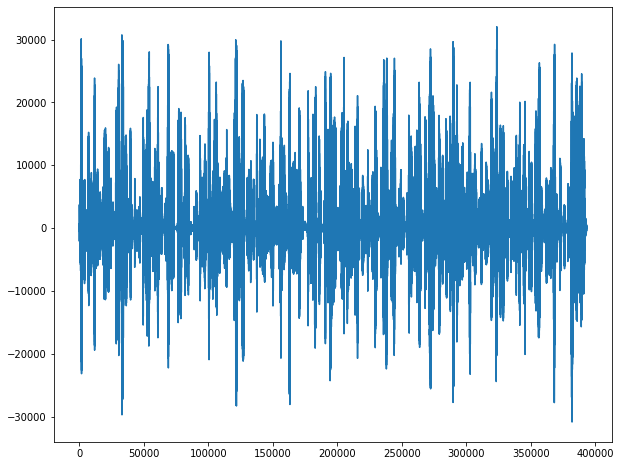

In [106]:
plt.figure(figsize=(10,8))
plt.plot(audiodata)

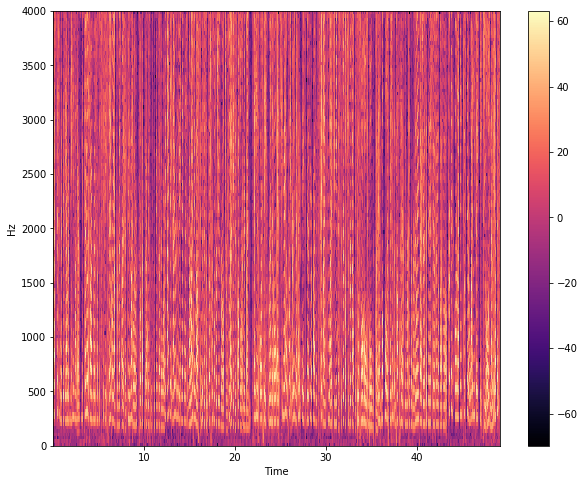

In [108]:
plt.figure(figsize=(10,8))
#Power Spectral Density (PSD) is the measure of signal's power content versus frequency
#mode = PSD helps ensure that random data can be overlaid and compared independently of the 
#spectral resolution used to measure the data
plt.specgram(audiodata, mode='psd',Fs=samplefreq, cmap = 'magma')
plot.xlabel('Time')
plot.ylabel('Hz')
plt.colorbar()

## Recording audio in python (to wav file)

In [118]:
import sounddevice as sd
import numpy as np
import scipy.io.wavfile as wav

Recording Audio
Audio recording complete , Play Audio
Play Audio Complete


In [157]:
fs=44100
duration = 5  # seconds
myrecording = sd.rec(duration * fs, samplerate=fs, channels=1,dtype='float64')
print("Recording Audio")
sd.wait()
print("Audio recording complete , Play Audio")

Recording Audio
Audio recording complete , Play Audio


In [158]:
sd.play(myrecording, fs)
sd.wait()
print("Play Audio Complete")

Play Audio Complete


In [121]:
type(myrecording)

numpy.ndarray

In [122]:
myrecording.shape

(220500, 1)

In [123]:
from scipy.io.wavfile import write

In [159]:
#save np array as wav sound file
write("gabi_sample.wav", fs, myrecording)

## Now lets read in the recording

In [1]:
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [2]:
freak, my_voice = wavfile.read("gabi_sample.wav")

In [5]:
ipd.Audio('gabi_sample.wav')

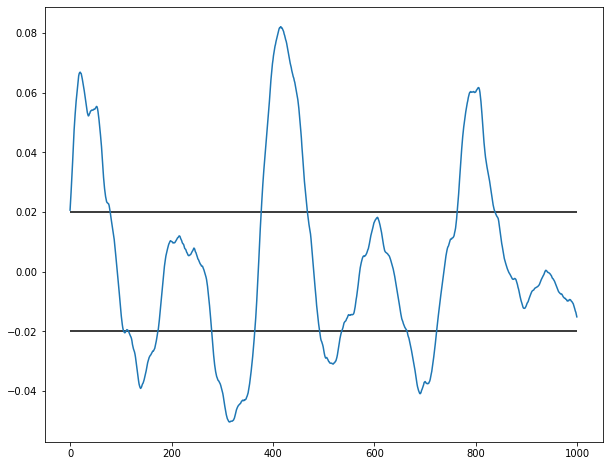

In [20]:
plt.figure(figsize=(10,8))
plt.plot(my_voice[45000:46000])
plt.hlines(y=.02, xmin=0, xmax=len(my_voice[45000:46000]), colors='k', linestyles='solid')
plt.hlines(y=-.02, xmin=0, xmax=len(my_voice[45000:46000]), colors='k', linestyles='solid')

In [21]:
np.average(my_voice[45000:46000])

0.003925964896707683

In [237]:
from scipy import signal

In [246]:
binning = 100

In [247]:
new_my_voice = signal.resample(my_voice, int(220500/binning))

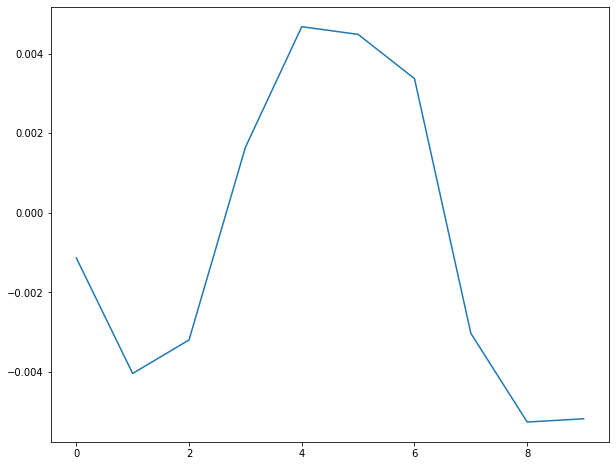

In [248]:
plt.figure(figsize=(10,8))
plt.plot(new_my_voice[int(35000/binning):int(36000/binning)])

In [202]:
type(my_voice)

numpy.ndarray

In [204]:
my_voice.shape

(220500,)

In [212]:
max(my_voice)

0.20790313184261322

In [213]:
min(my_voice)

-0.1782396137714386

In [203]:
my_voice

array([ 3.20714728e-13, -1.02660351e-08, -6.31679882e-07, ...,
        1.23803120e-03,  6.40412385e-04,  3.95878858e-04])

In [37]:
cutoff_for_speaking = 0.03

In [38]:
speaking_time = []
current_start = 0
first_time_flag = True
speech_bool=True

In [39]:
for idx, value in enumerate(my_voice[::500]):
    max_amp = max(abs(my_voice[idx*500:(idx+1)*500]))
    if first_time_flag:
        if max_amp>cutoff_for_speaking:
            first_time_flag = False
            speech_bool = True
            current_start = ixd
            continue
        else:
            first_time_flag = False
            speech_bool = False
            current_start =idx
            continue
            
    if speech_bool: #on a speech run
        #then we will check if next value is also speech intenstiy
        if max_amp<cutoff_for_speaking:
            speaking_time.append({'start':current_start, 'end':(idx-1)*500, 'type': 'speech'})
            speech_bool = False
            current_start = idx*500
            continue
        else:
            continue
            
        
    else: #check that next value is also not speech 
        if max_amp>cutoff_for_speaking:
            speaking_time.append({'start':current_start, 'end':(idx-1)*500, 'type': 'silence'})
            speech_bool= True
            current_start = idx*500
            continue
        else:
            continue
        
    

In [40]:
# for idx, value in enumerate(my_voice):
#     if first_time_flag:
#         if abs(value)>cutoff_for_speaking:
#             first_time_flag = False
#             speech_bool = True
#             current_start = ixd
#             continue
#         else:
#             first_time_flag = False
#             speech_bool = False
#             current_start =idx
#             continue
            
#     if speech_bool: #on a speech run
#         #then we will check if next value is also speech intenstiy
#         if abs(value)<cutoff_for_speaking:
#             speaking_time.append({'start':current_start, 'end':idx-1, 'type': 'speech'})
#             speech_bool = False
#             current_start = idx
#             continue
#         else:
#             continue
            
        
#     else: #check that next value is also not speech 
#         if abs(value)>cutoff_for_speaking:
#             speaking_time.append({'start':current_start, 'end':idx-1, 'type': 'silence'})
#             speech_bool= True
#             current_start = idx
#             continue
#         else:
#             continue
        

In [41]:
len(speaking_time)

28

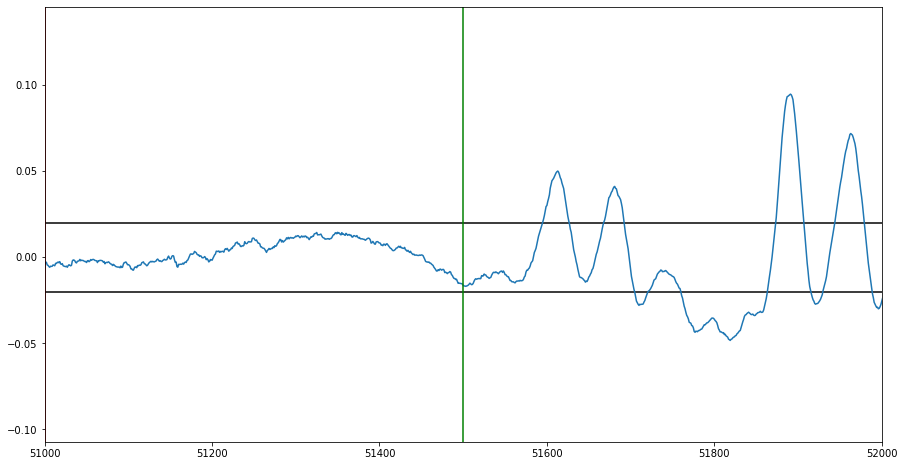

In [44]:
plt.figure(figsize=(15,8))
plt.plot(my_voice)
plt.hlines(y=.02, xmin=0, xmax=len(my_voice), colors='k', linestyles='solid')
plt.hlines(y=-.02, xmin=0, xmax=len(my_voice), colors='k', linestyles='solid')
plt.xlim(51000,52000)
# xcoords = [0.22058956, 0.33088437, 2.20589566]
for dictionary in speaking_time:
    if dictionary['type']=='speech':
        clr = 'green'
    else:
        clr = 'red'
#     plt.set_color(color=clr)
    plt.axvline(x=dictionary['start'],color=clr)
    plt.axvline(x=dictionary['end'],color=clr)

In [ ]:
#get amplitude for the last  five periods
#get abs(average amplitude)
#if amplitude_avg > cutoff
    #we are in a spee ch block

In [233]:
speaking_time

[{'start': 0, 'end': 35487, 'type': 'silence'},
 {'start': 35488, 'end': 35490, 'type': 'speech'},
 {'start': 35491, 'end': 35496, 'type': 'silence'},
 {'start': 35497, 'end': 35498, 'type': 'speech'},
 {'start': 35499, 'end': 35499, 'type': 'silence'},
 {'start': 35500, 'end': 35500, 'type': 'speech'},
 {'start': 35501, 'end': 35506, 'type': 'silence'},
 {'start': 35507, 'end': 35507, 'type': 'speech'},
 {'start': 35508, 'end': 35510, 'type': 'silence'},
 {'start': 35511, 'end': 35512, 'type': 'speech'},
 {'start': 35513, 'end': 35513, 'type': 'silence'},
 {'start': 35514, 'end': 35516, 'type': 'speech'},
 {'start': 35517, 'end': 35518, 'type': 'silence'},
 {'start': 35519, 'end': 35519, 'type': 'speech'},
 {'start': 35520, 'end': 35522, 'type': 'silence'},
 {'start': 35523, 'end': 35525, 'type': 'speech'},
 {'start': 35526, 'end': 35534, 'type': 'silence'},
 {'start': 35535, 'end': 35535, 'type': 'speech'},
 {'start': 35536, 'end': 35536, 'type': 'silence'},
 {'start': 35537, 'end': 

In [198]:
freak

44100

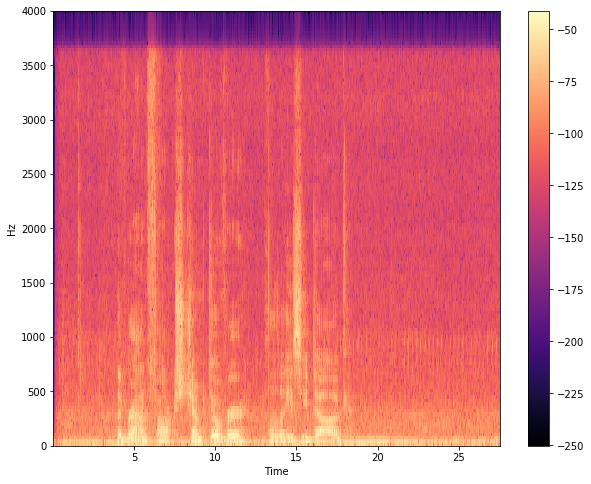

In [171]:
#plot freq
plt.figure(figsize=(10,8))
plt.specgram(my_voice, mode='psd',Fs=samplefreq, cmap = 'magma')
plot.xlabel('Time')
plot.ylabel('Hz')
plt.colorbar()

In [199]:
freak, my_voice = wavfile.read("mra_sample.wav")

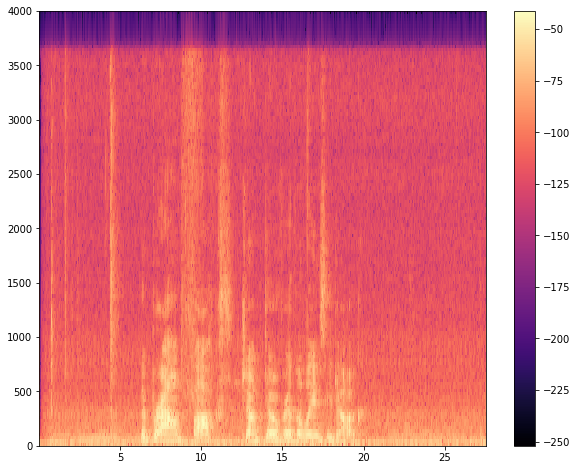

In [200]:
#plot freq
plt.figure(figsize=(10,8))
plt.specgram(my_voice, mode='psd',Fs=samplefreq, cmap = 'magma')
plt.colorbar()

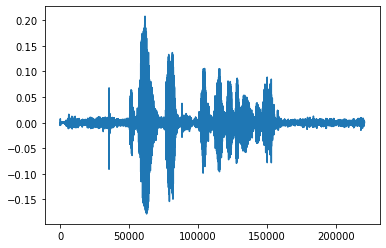

In [173]:
plt.plot(my_voice)

In [176]:
# from matplotlib import cm
# fig, ax = plt.subplots()
# mfcc_data= np.swapaxes(mfcc_data, 0 ,1)
# cax = ax.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm, origin='lower')
# ax.set_title('MFCC')

# plt.show()

[Text(0.5, 1.0, 'MFCC')]

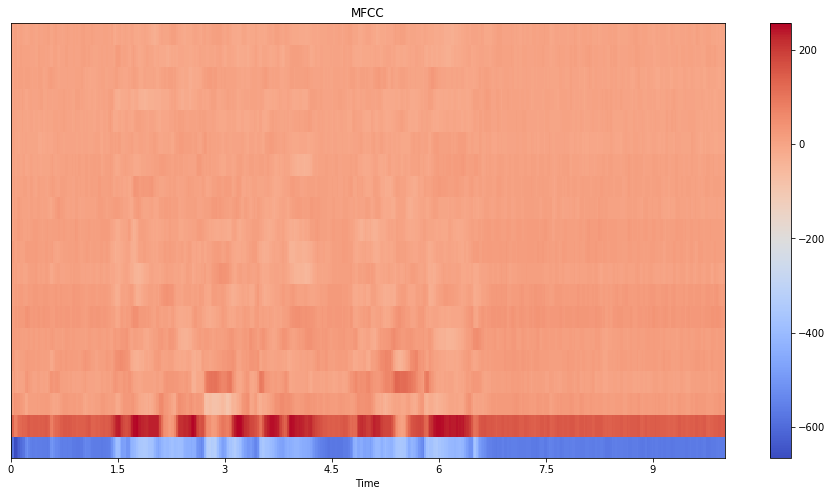

In [201]:
y, sr = librosa.load("gabi_sample.wav", sr=44100, mono=True, offset=0.0, duration=100, res_type='kaiser_best')
mfcc = librosa.feature.mfcc(y=y, sr=sr)
fig, ax = plot.subplots(figsize=(16,8))
img = librosa.display.specshow(mfcc, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')

[Text(0.5, 1.0, 'MFCC')]

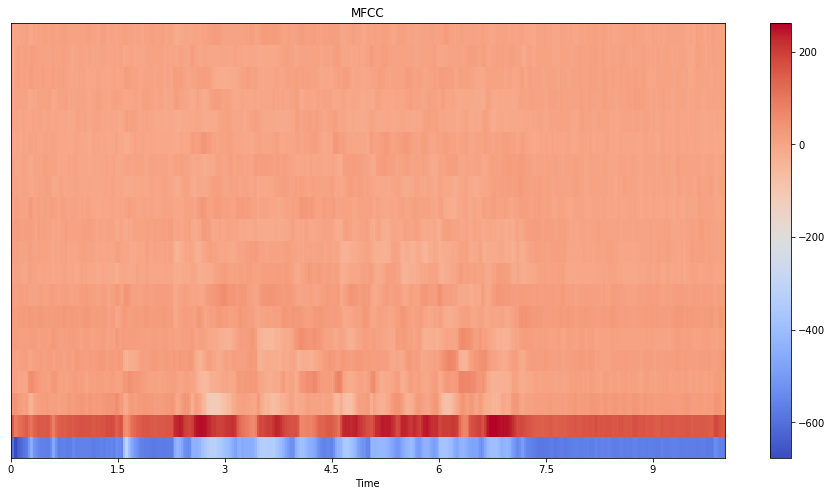

In [191]:
y, sr = librosa.load("mra_sample.wav", sr=44100, mono=True, offset=0.0, duration=5, res_type='kaiser_best')
mfcc = librosa.feature.mfcc(y=y, sr=sr)
fig, ax = plot.subplots(figsize=(16,8))
img = librosa.display.specshow(mfcc, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')

In [187]:
mfcc.shape

(20, 431)

In [192]:
#reshape 2d array into 1d array for ML model

In [193]:
#scipy.io.wavfile.write(filename, rate, data

In [194]:
from python_speech_features import mfcc

In [ ]:
python_speech_features.base.mfcc(signal, samplerate=16000, winlen=0.025, winstep=0.01, numcep=13, nfilt=26,
                                 nfft=512, lowfreq=0, highfreq=None, preemph=0.97, ceplifter=22, appendEnergy=True, 
                                 winfunc=<function <lambda>>)

In [ ]:
	
signal – the audio signal from which to compute features. Should be an N*1 array
samplerate – the samplerate of the signal we are working with.
winlen – the length of the analysis window in seconds. Default is 0.025s (25 milliseconds)
winstep – the step between successive windows in seconds. Default is 0.01s (10 milliseconds)